In [2]:
import pandas as pd
import csv
import urllib
import json
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import numpy as np

In [103]:
## top 10 fortune 500 US companies
companies=['WMT','FB','GOOGL','MSFT','CVS','WBA','AMZN','EBAY']

In [104]:
for i in companies:
    url='https://www.quandl.com/api/v3/datatables/WIKI/PRICES.json?ticker='+ i +\
        '&api_key=_oBpk4D9DSWY3CBN_G-Z'
    response = urllib.urlopen(url)
    data = json.loads(response.read())
    
    with open('stock_price/'+i, 'w') as fi:
        json.dump(data, fi)


In [105]:
stock={}
for i in companies:
    json_data=open('stock_price/'+i).read()
    data = json.loads(json_data)
    col=map(lambda x: x['name'],data['datatable']['columns'])
    stock[i]=pd.DataFrame(columns=col,data=data['datatable']['data'])

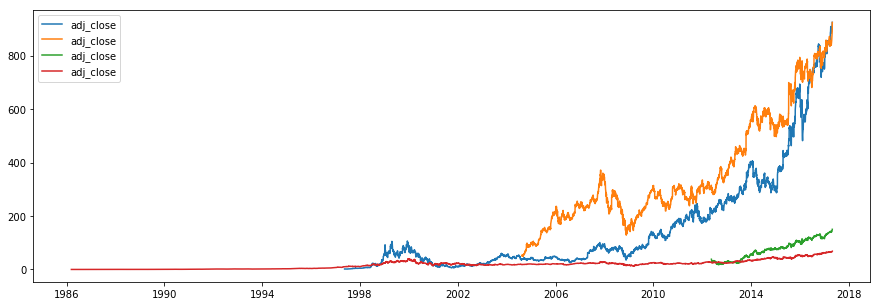

In [125]:
plt.figure(figsize=(15,5))
#plt.plot(stock['WMT'].date,stock['WMT'].adj_close)
#plt.plot(stock['CVS'].date,stock['CVS'].adj_close)
#plt.plot(stock['WBA'].date,stock['WBA'].adj_close)
plt.plot(stock['AMZN'].date,stock['AMZN'].adj_close)
plt.plot(stock['GOOGL'].date,stock['GOOGL'].adj_close)
plt.plot(stock['FB'].date,stock['FB'].adj_close)
plt.plot(stock['MSFT'].date,stock['MSFT'].adj_close)
plt.legend()

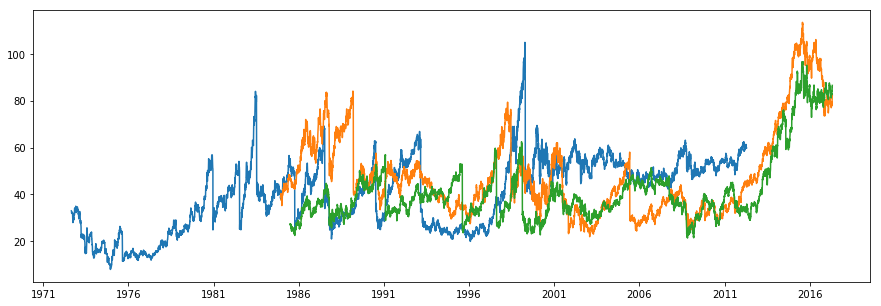

In [116]:
plt.figure(figsize=(15,5))
plt.plot(stock['WMT'].date,stock['WMT'].close,label='walmart')
plt.plot(stock['CVS'].date,stock['CVS'].close,label= 'cvs')
plt.plot(stock['WBA'].date,stock['WBA'].close,label= 'walgreens')

In [3]:
df=pd.read_csv('WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv',
              usecols=['ticker','date','adj_close'])

In [4]:
df.date =pd.to_datetime(df.date)

In [5]:
ticker = sorted(list(set(df.ticker.values)))
updated_ticker = df[df.date == df[df.ticker == "A"].date.max()].ticker
df = df[df.ticker.isin(updated_ticker)]

In [181]:
len(df[df.date == dt.date(2012,4,30)])

2309

In [187]:
len(df[df.date == dt.date(2017,4,28)])

2574

In [6]:
updated_ticker = df[df.date == dt.date(2012,4,30)].ticker
df = df[df.ticker.isin(updated_ticker)]

In [20]:
date = df[(df.ticker=='A')].date[3130:4400]

In [21]:
for i in ['A']:
    one_stock = df[(df.ticker==i) & (df['date'].isin(date))]
    stocks = pd.DataFrame(index=[i],columns=date,
                          data=np.reshape(one_stock.adj_close.values,(1,1258)))

In [27]:
stocks

date,2012-04-30 00:00:00,2012-05-01 00:00:00,2012-05-02 00:00:00,2012-05-03 00:00:00,2012-05-04 00:00:00,2012-05-07 00:00:00,2012-05-08 00:00:00,2012-05-09 00:00:00,2012-05-10 00:00:00,2012-05-11 00:00:00,...,2017-04-17 00:00:00,2017-04-18 00:00:00,2017-04-19 00:00:00,2017-04-20 00:00:00,2017-04-21 00:00:00,2017-04-24 00:00:00,2017-04-25 00:00:00,2017-04-26 00:00:00,2017-04-27 00:00:00,2017-04-28 00:00:00
A,28.965131,29.507626,29.555695,28.985732,28.161688,28.058683,27.653528,27.420049,27.289576,27.090432,...,53.46,53.03,53.07,53.13,53.27,54.44,54.81,54.83,55.43,55.05


In [32]:
for i in updated_ticker[1:300]:
    one_stock = df[(df.ticker==i) & (df['date'].isin(date))].set_index('date')
    stocks_add =pd.DataFrame(one_stock['adj_close']).rename(columns={'adj_close':i}).T
    stocks = pd.concat([stocks,stocks_add])

In [39]:
normalized_stocks=stocks.copy()

In [94]:
standardized_stocks=stocks.copy()

In [48]:
for i in range(300):
    normalized_stocks.iloc[i]=(stocks.iloc[i]-stocks.iloc[i].min())/(stocks.iloc[i].max()-stocks.iloc[i].min())

In [95]:
for i in range(300):
    standardized_stocks.iloc[i]=(stocks.iloc[i]-stocks.iloc[i].mean())/stocks.iloc[i].std()

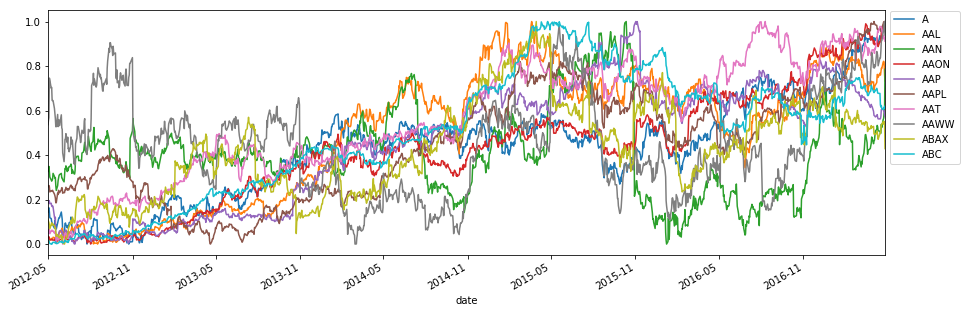

In [57]:
normalized_stocks.iloc[:10].T.plot(figsize=(15,5))#legend=False
plt.legend(bbox_to_anchor=(1.0, 1.02))

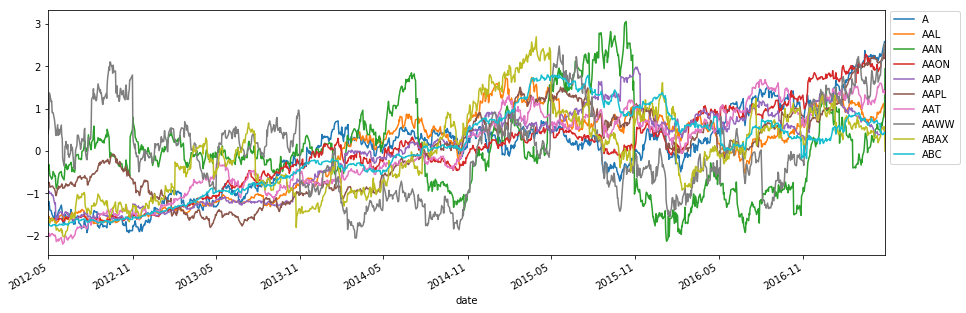

In [96]:
standardized_stocks.iloc[:10].T.plot(figsize=(15,5))#legend=False
plt.legend(bbox_to_anchor=(1.0, 1.02))

In [58]:
from sklearn.cluster import KMeans

In [64]:
km= KMeans(n_clusters=10).fit(normalized_stocks)

In [97]:
km_s= KMeans(n_clusters=10).fit(standardized_stocks)

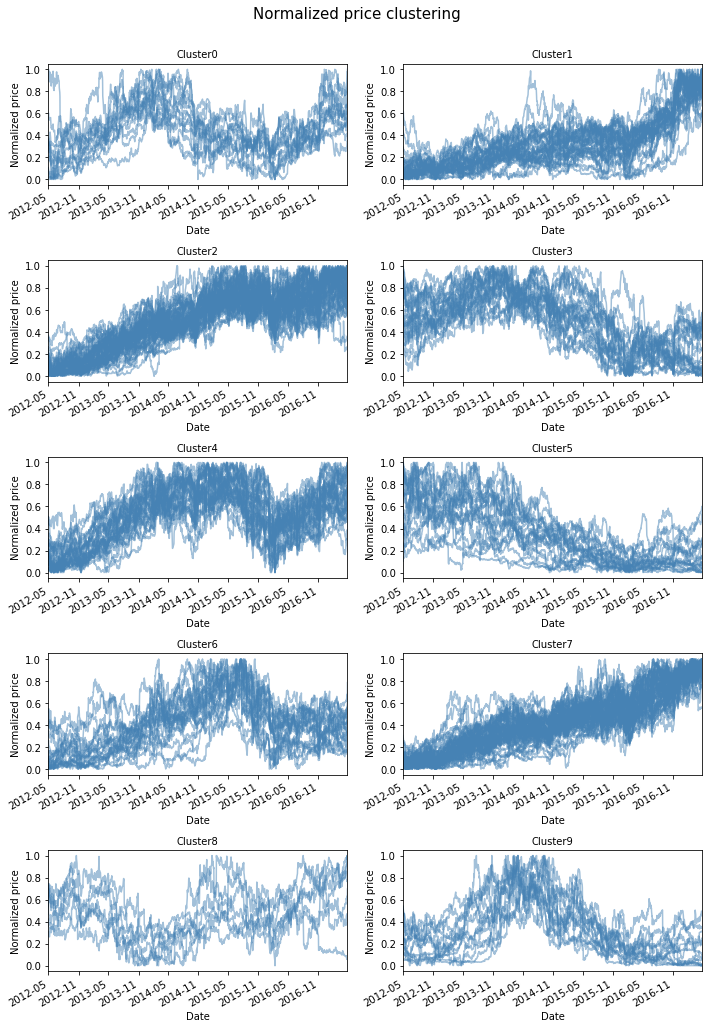

In [110]:
plt.figure(figsize=(10,15))
plt.suptitle('Normalized price clustering',fontsize=15)
for i in range(10):
    ax=plt.subplot(5,2,i+1)
    normalized_stocks.iloc[km.labels_==i].T.plot(legend=False,ax=ax,color='steelblue',alpha=0.5)
    plt.ylabel('Normalized price',fontsize=10)
    plt.xlabel('Date',fontsize=10)
    plt.title('Cluster'+str(i),fontsize=10)
    #print i,":",normalized_stocks.iloc[km.labels_==i].index
#plt.legend(bbox_to_anchor=(1.0, 1.02))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

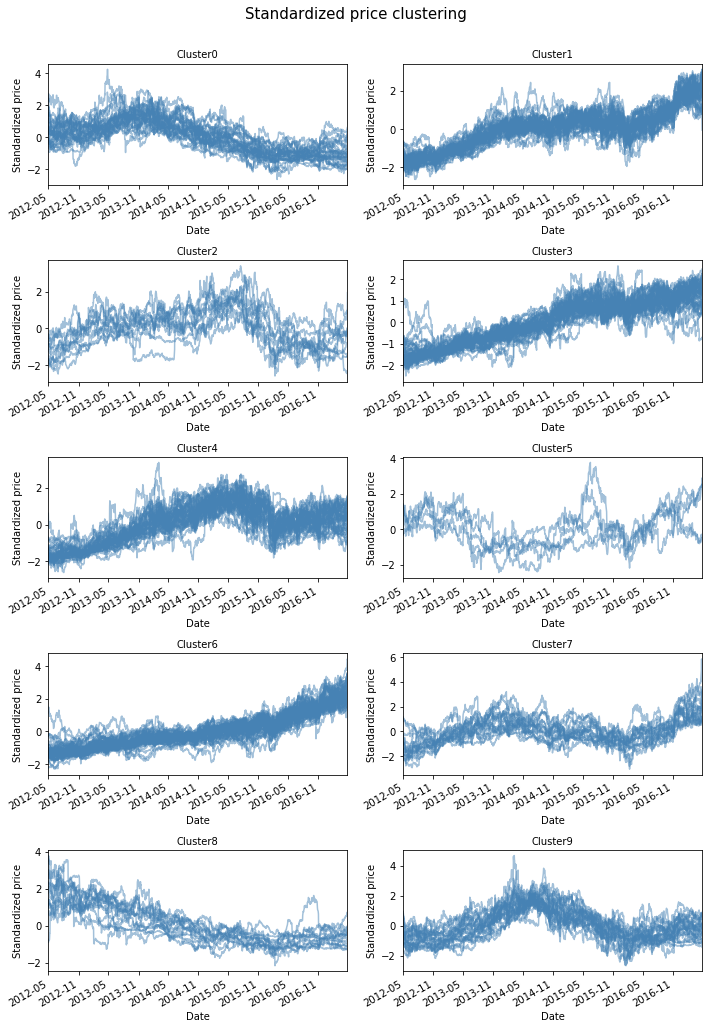

In [112]:
plt.figure(figsize=(10,15))
for i in range(10):
    ax=plt.subplot(5,2,i+1)
    standardized_stocks.iloc[km_s.labels_==i].T.plot(legend=False,ax=ax,color='steelblue',alpha=0.5)
    plt.ylabel('Standardized price',fontsize=10)
    plt.xlabel('Date',fontsize=10)
    plt.title('Cluster'+str(i),fontsize=10)
    #print i,":",normalized_stocks.iloc[km.labels_==i].index
#plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.suptitle('Standardized price clustering',fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
